In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import emcee

In [2]:
def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

np.random.seed(42)

In [18]:
nwalkers = 1000
mean_acceptance_fraction_arr = []
mean_autocorrelation_time_arr = []
time_arr = []


def sample_dim(ndim, nsamples, discard=0):
    
    p0 = np.random.rand(nwalkers, ndim)
    
    means = np.random.rand(ndim)

    cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
    cov = np.triu(cov)
    cov += cov.T - np.diag(cov.diagonal())
    cov = np.dot(cov, cov)
    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])
    
    time_start = time.process_time()
    sampler.run_mcmc(p0, nsamples);
    time_stop = time.process_time()
    delta = time_stop - time_start
    time_arr.append(delta)
    print("Time for sampling: ", delta)
    
    samples = sampler.get_chain(flat=True)
    plt.hist(samples[:, 0], 100, color="k", histtype="step")
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$p(\theta_1)$");
    
    mean_acceptance_fraction = np.mean(sampler.acceptance_fraction)
    mean_autocorrelation_time = np.mean(sampler.get_autocorr_time(discard=discard))
    mean_acceptance_fraction_arr.append(mean_acceptance_fraction)
    mean_autocorrelation_time_arr.append(mean_autocorrelation_time)
    
    print("Mean acceptance fraction: {0:.3f}".format(mean_acceptance_fraction))
    print("Mean autocorrelation time: {0:.3f} steps".format(mean_autocorrelation_time))

time for sampling:  75.175026
Mean acceptance fraction: 0.551
Mean autocorrelation time: 45.368 steps


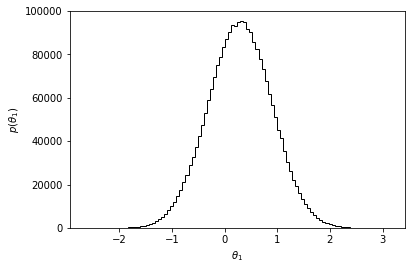

In [9]:
sample_dim(5, 2500)

time for sampling:  166.82555000000002
Mean acceptance fraction: 0.417
Mean autocorrelation time: 91.863 steps


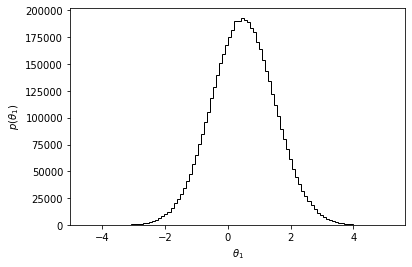

In [12]:
sample_dim(10, 5000)

time for sampling:  293.560706
Mean acceptance fraction: 0.345
Mean autocorrelation time: 152.272 steps


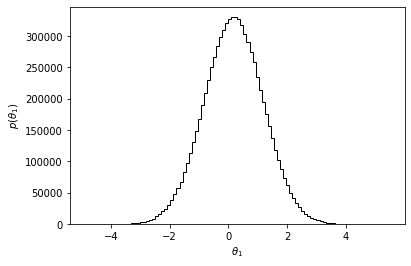

In [16]:
sample_dim(15, 8000)

time for sampling:  679.6750380000003
Mean acceptance fraction: 0.299
Mean autocorrelation time: 239.573 steps


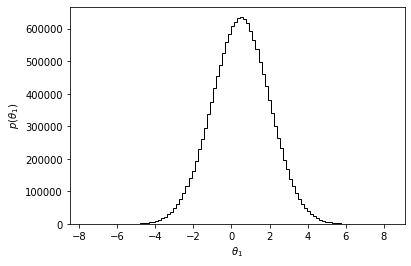

In [20]:
sample_dim(20, 15000)

time for sampling:  1043.2084759999998
Mean acceptance fraction: 0.267
Mean autocorrelation time: 329.807 steps


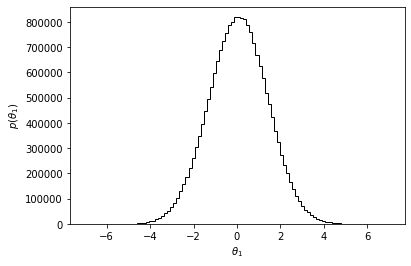

In [21]:
sample_dim(25, 20000)

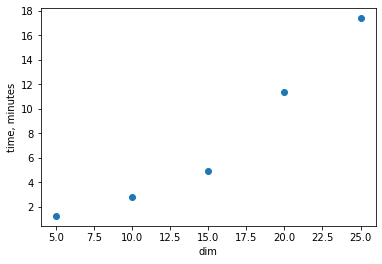

In [30]:
time_arr_ = np.array([75.175026, 166.82555000000002, 293.560706, 679.6750380000003, 1043.2084759999998]) / 60
dim_arr = [5, 10, 15, 20, 25]
plt.plot(dim_arr, time_arr_, "o")
plt.ylabel("time, minutes")
plt.xlabel("dim")
plt.savefig("time_dim.png", dpi=300)

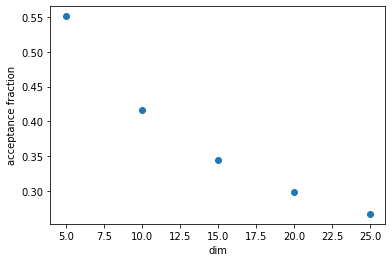

In [31]:
acc_fr_arr = [0.551, 0.417, 0.345, 0.299, 0.267]
dim_arr = [5, 10, 15, 20, 25]
plt.plot(dim_arr, acc_fr_arr, "o")
plt.ylabel("acceptance fraction")
plt.xlabel("dim")
plt.savefig("acc_fr_dim.png", dpi=300)

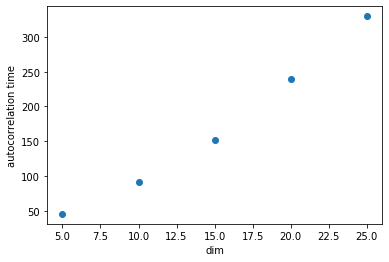

In [32]:
autocorr_time_arr_ = [45.368, 91.863, 152.272, 239.573, 329.807]
dim_arr = [5, 10, 15, 20, 25]
plt.plot(dim_arr, autocorr_time_arr_, "o")
plt.ylabel("autocorrelation time")
plt.xlabel("dim")
plt.savefig("autocorr_time_dim.png", dpi=300)

In [33]:
means

NameError: name 'means' is not defined